In [13]:
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import pickle
import numpy as np
import os 
from datetime import datetime

In [32]:
def get_snyc_time(filename_audio, filename_takte):
    dt_obj_audio = datetime.strptime(filename_audio, "%Y-%m-%d-%H-%M-%S-%f")
    dt_obj_takte = datetime.strptime(filename_takte, "%Y-%m-%d-%H-%M-%S-%f")
    dt_obj_diff = dt_obj_audio - dt_obj_takte
    return dt_obj_diff.total_seconds()  

In [33]:
test_file_audio = '2022-10-21-15-23-37-070900'
test_file_takte = '2022-10-21-15-23-36-893300'

#bpm_str = test_file.split("B")[1]
#bpm_str = bpm_str.replace(".wav", "")
#bpm = (int) (bpm_str)
#print(bpm)
audio_path = f'../../res/recorded_audios/{test_file_audio}.wav'
takt_path = f'../../res/recorded_takte/{test_file_takte}.pickle'

In [29]:
with open(takt_path, 'rb') as handle:
    takte = pickle.load(handle)
print(takte)
sync_takte = []
sync_time = get_snyc_time(test_file_audio, test_file_takte)
for t in takte:
    sync_takte.append(t -sync_time)
print(sync_takte)


[0.0, 0.502981424331665, 1.010704755783081, 1.5252044200897217, 2.0343081951141357, 2.545135021209717]
[-0.01776, 0.48522142433166504, 0.9929447557830811, 1.5074444200897217, 2.0165481951141357, 2.527375021209717]


In [34]:

y, sr = librosa.load(audio_path)


# get beats and onset
# https://librosa.org/doc/main/generated/librosa.beat.beat_track.html#librosa.beat.beat_track
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# some magic, i dont understand ;)
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
hop_length = 512

times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
for b,t  in zip(beats, takte):
    print(times[b] )

0.4876190476190476
1.0216780045351475
1.5325170068027212
2.043356009070295


4
[0.0, 0.502981424331665, 1.010704755783081, 1.5252044200897217, 2.0343081951141357, 2.545135021209717]


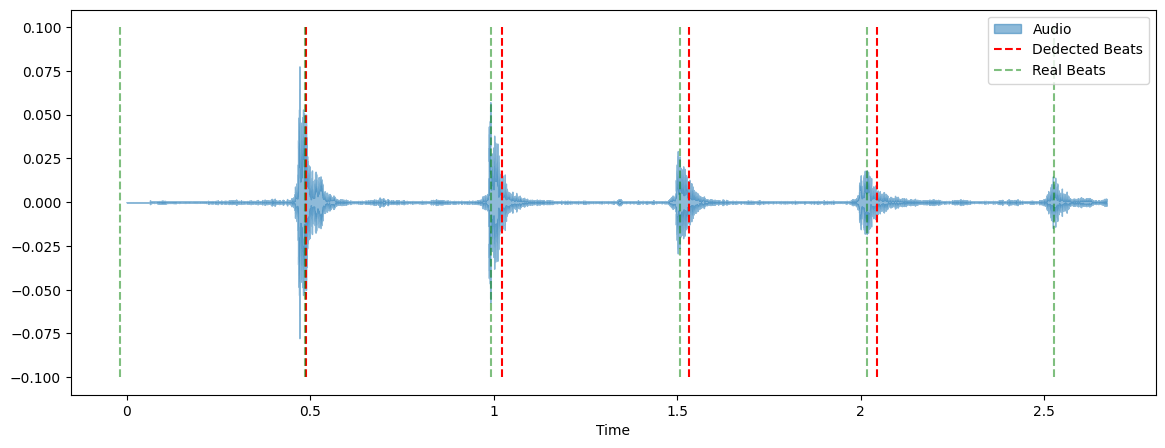

In [35]:
#normal audio:
fig, ax = plt.subplots(nrows = 1, sharex=True, figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5,  label='Audio')

#print(beats)
#ax.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
print(len(beats))
ax.vlines(times[beats], -0.1, 0.1, alpha=1, color='r',

           linestyle='--', label='Dedected Beats')
     
ax.vlines(sync_takte, -0.1, 0.1, alpha=0.5, color='g',

           linestyle='--', label='Real Beats')
print(takte)
ax.legend()
